# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

**Цель лабораторной работы:** 
Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
   - обработку пропусков в данных;
   - кодирование категориальных признаков;
   - масштабирование данных.

## Ход работы

Импортировал библиотеки

In [2188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Загрузил датасет

In [2189]:
data = pd.read_csv('Health Insurance Lead Prediction Raw Data.csv', sep=',')

Информация о размерах и структуре датасета

In [2190]:
data.shape

(50882, 14)

In [2191]:
data.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

## Обратботка пропусков

Проверил, где есть пропуски и сколько их

In [2192]:
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [2193]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


Функция для вывода уникальных значений столбца

In [2194]:
def print_unique(data, column, **kwargs):
    result = data[column].dropna().unique()
    try:
        kwargs['key']
    except:
        kwargs['key'] = None

    if kwargs['key']:
        result = sorted(result, key=kwargs['key'])
    else:
        result = sorted(result)
    print(f'Column: \'{column}\';\nUnique values: {result if len(result) < 50 else "[...]"};\nCount: {len(result)}')


Проверил столбец Health Indicator

In [2195]:
print_unique(data, 'Health Indicator')

Column: 'Health Indicator';
Unique values: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'];
Count: 9


Заполнил пропуски в столбце самым часто встречающимся значением

In [2196]:
hi_data = data[['Health Indicator']]
hi_data_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
hi_data = hi_data_imputer.fit_transform(hi_data)
hi_data

array([['X1'],
       ['X2'],
       ['X1'],
       ...,
       ['X2'],
       ['X2'],
       ['X3']], dtype=object)

In [2197]:
data[['Health Indicator']] = hi_data

Аналогичные действия провел с оставшимися двумя столбцами с пропусками

In [2198]:
print_unique(data, 'Holding_Policy_Duration', key=lambda x: float(x) if '+' not in x else 100)

Column: 'Holding_Policy_Duration';
Unique values: ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '14+'];
Count: 15


In [2199]:
hpd_data = data[['Holding_Policy_Duration']]
hpd_data_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
hpd_data = hpd_data_imputer.fit_transform(hpd_data)
hpd_data

array([['14+'],
       ['1.0'],
       ['1.0'],
       ...,
       ['14+'],
       ['2.0'],
       ['2.0']], dtype=object)

In [2200]:
data[['Holding_Policy_Duration']] = hpd_data

In [2201]:
print_unique(data, 'Holding_Policy_Duration')

Column: 'Holding_Policy_Duration';
Unique values: ['1.0', '10.0', '11.0', '12.0', '13.0', '14+', '14.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'];
Count: 15


In [2202]:
hpt_data = data[['Holding_Policy_Type']]
hpt_data_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
hpt_data = hpt_data_imputer.fit_transform(hpt_data)
hpt_data

array([[3.],
       [3.],
       [1.],
       ...,
       [1.],
       [2.],
       [3.]])

In [2203]:
data[['Holding_Policy_Type']] = hpt_data

Проверил, что больше пропусков не осталось

In [2204]:
data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [2205]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


## Кодирование категориальных признаков

In [2206]:
le = LabelEncoder()

Вывел все уникальные значения во всех столбцах, чтобы оценить, какие из них можно отнести к категориальным

In [2207]:
for column in data.columns:
    print_unique(data, column)
    print()

Column: 'ID';
Unique values: [...];
Count: 50882

Column: 'City_Code';
Unique values: ['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'];
Count: 36

Column: 'Region_Code';
Unique values: [...];
Count: 5316

Column: 'Accomodation_Type';
Unique values: ['Owned', 'Rented'];
Count: 2

Column: 'Reco_Insurance_Type';
Unique values: ['Individual', 'Joint'];
Count: 2

Column: 'Upper_Age';
Unique values: [...];
Count: 58

Column: 'Lower_Age';
Unique values: [...];
Count: 60

Column: 'Is_Spouse';
Unique values: ['No', 'Yes'];
Count: 2

Column: 'Health Indicator';
Unique values: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'];
Count: 9

Column: 'Holding_Policy_Duration';
Unique values: ['1.0', '10.0', '11.0', '12.0', '13.0', '14+', '14.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'];
Coun

Используя LabelEncoder, заменил категориальные признаки закодированными

In [2208]:
data['City_Code'] = le.fit_transform(data['City_Code'])
data['Region_Code'] = le.fit_transform(data['Region_Code'])
data['Accomodation_Type'] = le.fit_transform(data['Accomodation_Type'])
data['Reco_Insurance_Type'] = le.fit_transform(data['Reco_Insurance_Type'])
data['Is_Spouse'] = le.fit_transform(data['Is_Spouse'])
data['Health Indicator'] = le.fit_transform(data['Health Indicator'])
data['Holding_Policy_Type'] = le.fit_transform(data['Holding_Policy_Type'])
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,2761,1,0,36,36,0,0,14+,2,22,11628.0,0
1,2,31,932,0,1,75,22,0,1,1.0,2,22,30510.0,0
2,3,31,3241,0,0,32,32,0,0,1.0,0,19,7450.0,1
3,4,16,3842,0,1,52,48,0,0,14+,2,19,17780.0,0
4,5,34,1866,1,0,44,44,0,1,3.0,0,16,10404.0,0


Закодировал Holding_Policy_Duration в отдельный столбец, так как признак является числовым, однако также содержит значение, которое нельзя точно выразить числом.  

In [2209]:
data['Holding_Policy_Duration_Coded'] = data['Holding_Policy_Duration'].map({
    '1.0': 1,
    '2.0': 2,
    '3.0': 3,
    '4.0': 4,
    '5.0': 5,
    '6.0': 6,
    '7.0': 7,
    '8.0': 8,
    '9.0': 9,
    '10.0': 10,
    '11.0': 11,
    '12.0': 12,
    '13.0': 13,
    '14.0': 14,
    '14+': 15
})
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_Encoded
0,1,22,2761,1,0,36,36,0,0,14+,2,22,11628.0,0,15
1,2,31,932,0,1,75,22,0,1,1.0,2,22,30510.0,0,1
2,3,31,3241,0,0,32,32,0,0,1.0,0,19,7450.0,1,1
3,4,16,3842,0,1,52,48,0,0,14+,2,19,17780.0,0,15
4,5,34,1866,1,0,44,44,0,1,3.0,0,16,10404.0,0,3


## Масштабирование данных

In [2210]:
mms = MinMaxScaler()

Выбрал 3 числовых признака датасета и создал гистограммы для каждого

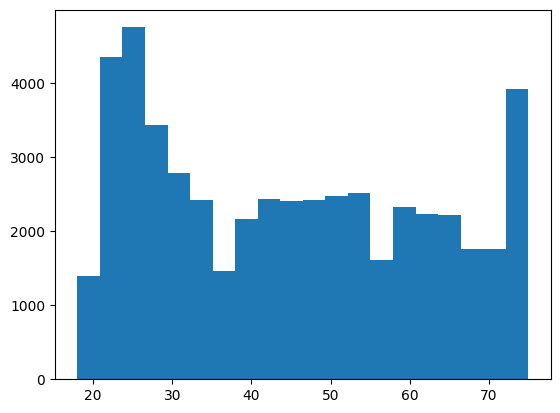

In [2211]:
plt.hist(data['Upper_Age'], 20)
plt.show()

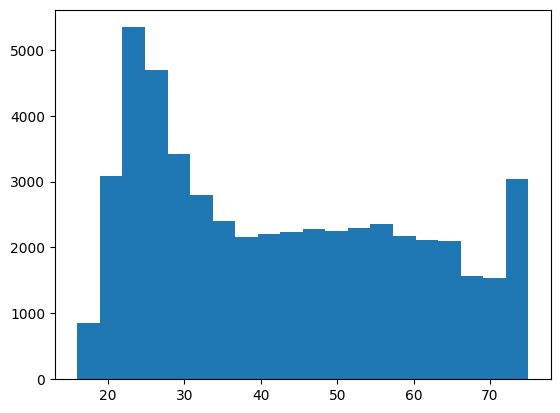

In [2212]:
plt.hist(data['Lower_Age'], 20)
plt.show()

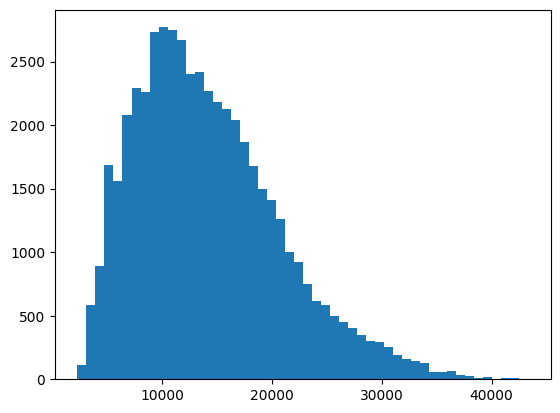

In [2213]:
plt.hist(data['Reco_Policy_Premium'], 50)
plt.show()

Масштабировал признаки с помощью MinMaxScaler и заменил данные датасета

In [2214]:
ua_scaled = mms.fit_transform(data[['Upper_Age']])
la_scaled = mms.fit_transform(data[['Lower_Age']])
rpp_scaled = mms.fit_transform(data[['Reco_Policy_Premium']])
data['Upper_Age'] = ua_scaled
data['Lower_Age'] = la_scaled
data['Reco_Policy_Premium'] = rpp_scaled

Для сравнения вывел гистограммы для масштабированных признаков

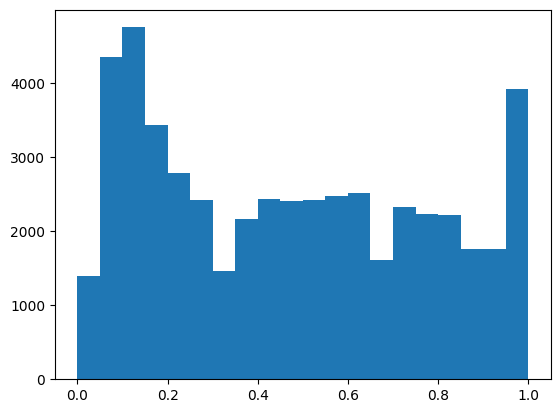

In [2215]:
plt.hist(data['Upper_Age'], 20)
plt.show()

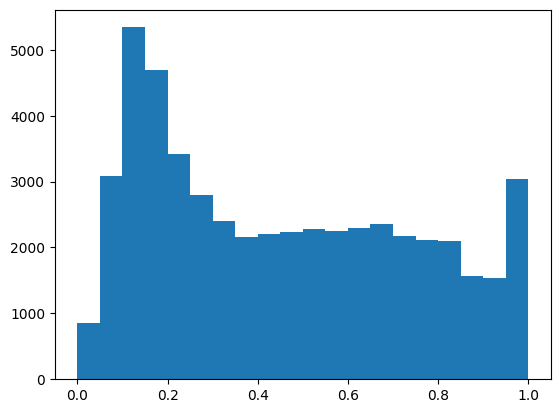

In [2216]:
plt.hist(data['Lower_Age'], 20)
plt.show()

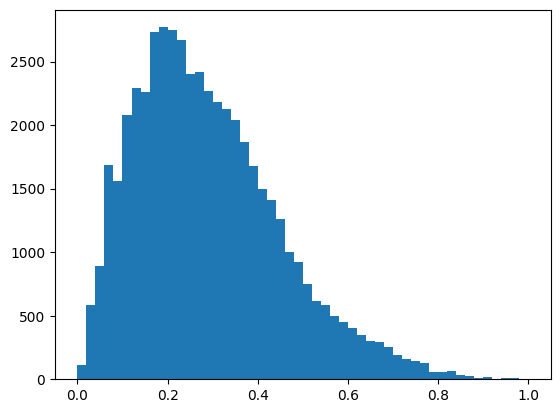

In [2217]:
plt.hist(data['Reco_Policy_Premium'], 50)
plt.show()

Первые 5 строчек датасета после всех преобразований

In [2218]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_Encoded
0,1,22,2761,1,0,0.315789,0.338983,0,0,14+,2,22,0.227609,0,15
1,2,31,932,0,1,1.000000,0.101695,0,1,1.0,2,22,0.687356,0,1
2,3,31,3241,0,0,0.245614,0.271186,0,0,1.0,0,19,0.125881,1,1
3,4,16,3842,0,1,0.596491,0.542373,0,0,14+,2,19,0.377401,0,15
4,5,34,1866,1,0,0.456140,0.474576,0,1,3.0,0,16,0.197807,0,3
